In [1]:
#1
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include=['number']).dropna()

# Features and target
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


MSE: 2242178.9040856035
MAE: 888.4808633901026


In [2]:
#2
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')


RMSE: 1497.3906985438382


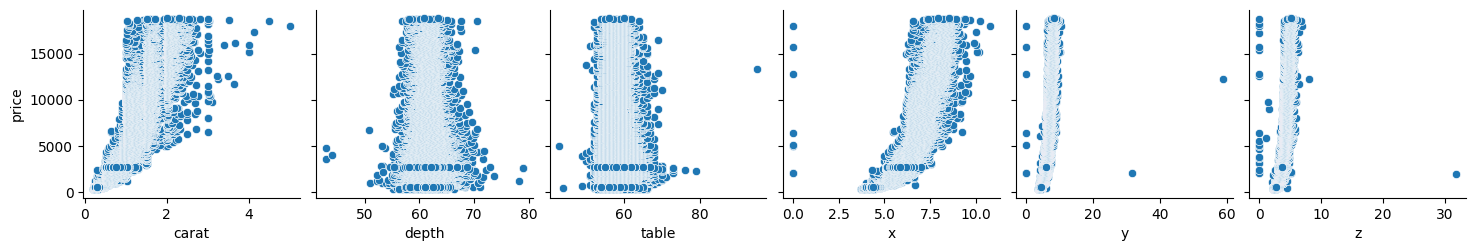

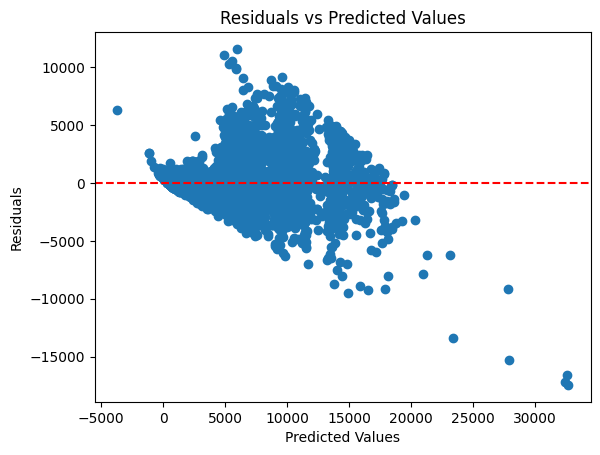

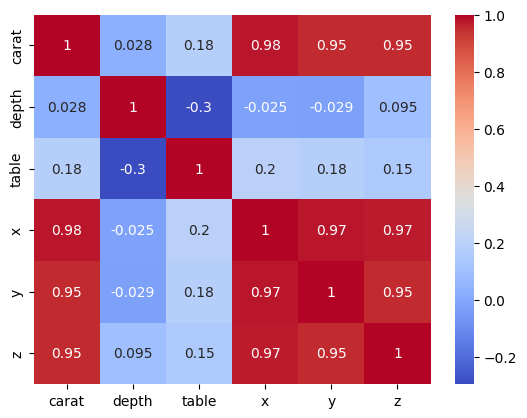

  feature          VIF
0   carat    70.132799
1   depth   515.146274
2   table   500.595341
3       x  1284.949828
4       y   530.998218
5       z   540.677349


In [3]:
#3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scatter plot to check linearity
sns.pairplot(diamonds, x_vars=X.columns, y_vars='price')
plt.show()

# Residuals plot for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Correlation matrix for multicollinearity
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Variance Inflation Factor (VIF) for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


In [4]:
#4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared score: {r_squared}')


R-squared score: 0.8589542625888938


In [5]:
#5
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients, intercept, and R-squared score
coeff = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f'Coefficient: {coeff}')
print(f'Intercept: {intercept}')
print(f'R-squared score: {r_squared}')


Coefficient: 41.768061011651646
Intercept: 0.011651153205267661
R-squared score: 0.9999945205426068


In [6]:
#6
tips = sns.load_dataset('tips')

# Features and target
X = tips[['total_bill']]
y = tips['tip']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')


Slope: 0.10502451738435337
Intercept: 0.9202696135546731


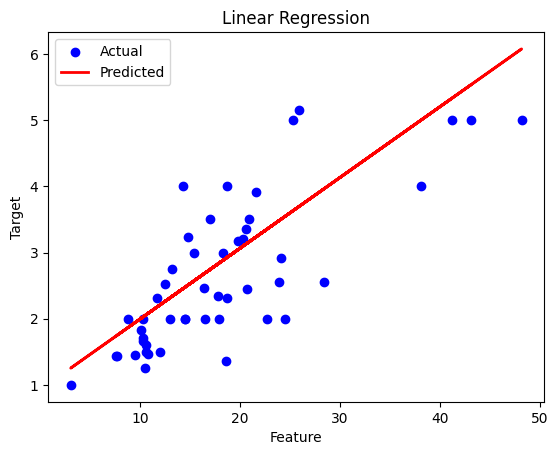

In [8]:
#7
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot data points and regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()



In [9]:
#8
import pickle

# Pickle the model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print('Model saved to linear_regression_model.pkl')


Model saved to linear_regression_model.pkl


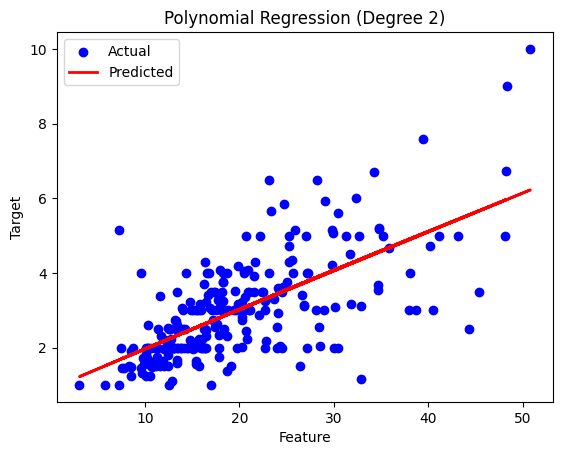

In [10]:
#9
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly = PolynomialFeatures(degree=2)

# Create a pipeline that fits the polynomial model
model = make_pipeline(poly, LinearRegression())

# Fit model
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot data points and polynomial regression curve
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


In [11]:
#10
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
coef = model.coef_[0][0]
intercept = model.intercept_[0]

print(f'Coefficient: {coef}')
print(f'Intercept: {intercept}')


Coefficient: 2.7701133864384837
Intercept: 4.215096157546747


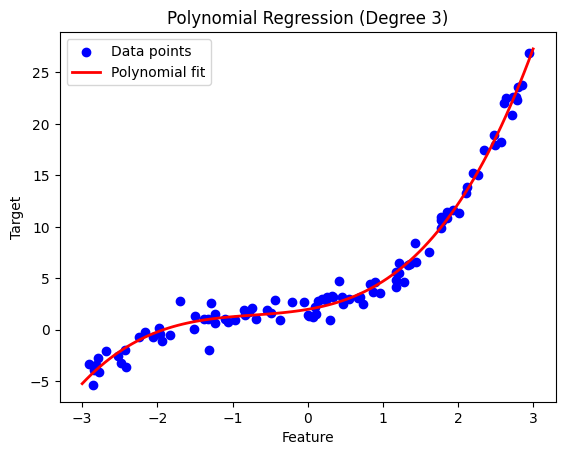

In [12]:
#11
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic non-linear data
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**3 + X**2 + X + 2 + np.random.randn(100, 1)

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)

# Create and fit the polynomial regression model
model = make_pipeline(poly, LinearRegression())
model.fit(X, y)

# Predict and plot
X_fit = np.linspace(-3, 3, 100).reshape(100, 1)
y_fit = model.predict(X_fit)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Polynomial fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


In [13]:
#12
from sklearn.datasets import make_regression

# Generate synthetic data with two features
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients, intercept, and R-squared score
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X, y)

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'R-squared score: {r_squared}')


Coefficients: [87.71995992 74.0772607 ]
Intercept: 0.0021635808446101024
R-squared score: 0.9999989877187189


In [14]:
#13
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MSE: 0.007805425042123842
MAE: 0.0710449313141407
RMSE: 0.08834831657775853


In [15]:
#14
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate synthetic data with multiple features
X, _ = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


     feature       VIF
0  feature_0  1.019320
1  feature_1  1.012651
2  feature_2  1.059337
3  feature_3  1.046592
4  feature_4  1.020596


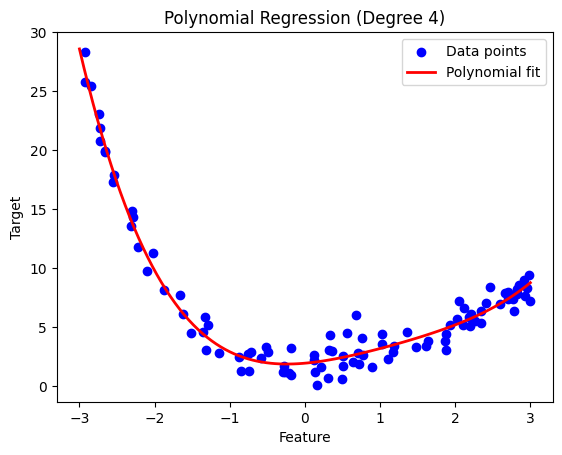

In [16]:
#15
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data for polynomial relationship (degree 4)
X = 6 * np.random.rand(100, 1) - 3
y = 0.1 * X**4 - 0.5 * X**3 + X**2 + X + 2 + np.random.randn(100, 1)

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)

# Create and fit the polynomial regression model
model = make_pipeline(poly, LinearRegression())
model.fit(X, y)

# Predict and plot
X_fit = np.linspace(-3, 3, 100).reshape(100, 1)
y_fit = model.predict(X_fit)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Polynomial fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()


In [17]:
#16
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with multiple features
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Fit model
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

# Calculate R-squared score
r_squared = pipeline.score(X, y)
print(f'R-squared score: {r_squared}')


R-squared score: 0.9999985640975169


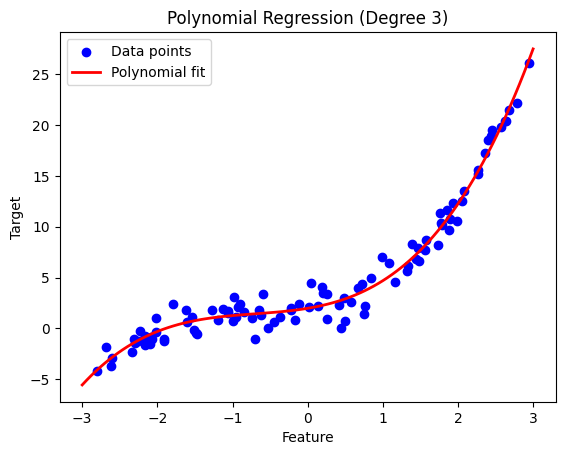

In [18]:
#17
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data for polynomial relationship (degree 3)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**3 + X**2 + X + 2 + np.random.randn(100, 1)

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)

# Create and fit the polynomial regression model
model = make_pipeline(poly, LinearRegression())
model.fit(X, y)

# Predict and plot
X_fit = np.linspace(-3, 3, 100).reshape(100, 1)
y_fit = model.predict(X_fit)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Polynomial fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


In [19]:
#18
# Generate synthetic data with 5 features
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and R-squared score
coefficients = model.coef_
r_squared = model.score(X, y)

print(f'R-squared score: {r_squared}')
print(f'Coefficients: {coefficients}')


R-squared score: 0.9999995564125111
Coefficients: [60.59000738 98.65432927 64.55891226 57.05696343 35.60947647]


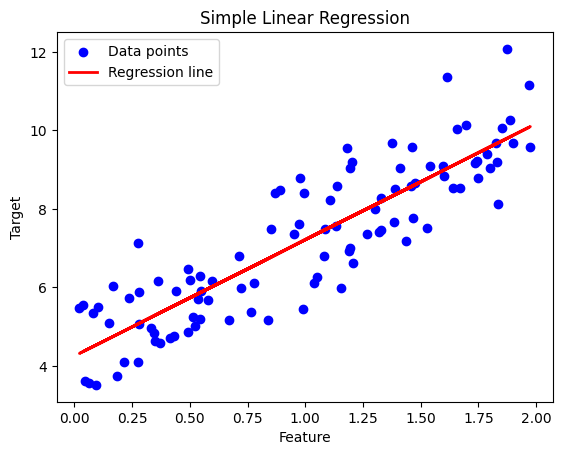

In [20]:
#19
# Generate synthetic data for linear regression
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [21]:
#20
from sklearn.datasets import make_regression

# Generate synthetic data with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and R-squared score
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X, y)

print(f'R-squared score: {r_squared}')
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


R-squared score: 0.9999985640975169
Coefficients: [28.2045949  75.05077568 17.75449804]
Intercept: 0.012492515759104705


In [22]:
#21
import pickle

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
y_pred = loaded_model.predict(X)
print(f'Predictions: {y_pred[:5]}')


Predictions: [ 13.52236521 -18.73769942 111.4583115  -77.93052821 -36.00227956]


In [23]:
#22
tips = sns.load_dataset('tips')

# Convert categorical features to one-hot encoding
tips_encoded = pd.get_dummies(tips, drop_first=True)

# Features and target
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Coefficients: [ 0.09448701  0.175992    0.03244094  0.08640832  0.1622592   0.04080082
  0.13677854 -0.0681286 ]
Intercept: 0.5908374259513756


In [24]:
#23
from sklearn.linear_model import Ridge

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_coefficients = linear_model.coef_
linear_r_squared = linear_model.score(X, y)

# Fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
ridge_coefficients = ridge_model.coef_
ridge_r_squared = ridge_model.score(X, y)

print(f'Linear Regression Coefficients: {linear_coefficients}')
print(f'Linear Regression R-squared score: {linear_r_squared}')
print(f'Ridge Regression Coefficients: {ridge_coefficients}')
print(f'Ridge Regression R-squared score: {ridge_r_squared}')


Linear Regression Coefficients: [60.59000738 98.65432927 64.55891226 57.05696343 35.60947647]
Linear Regression R-squared score: 0.9999995564125111
Ridge Regression Coefficients: [60.00694188 97.51793602 63.45136759 56.40717681 35.40203643]
Ridge Regression R-squared score: 0.9998666852290666


In [25]:
#24
from sklearn.model_selection import cross_val_score

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Evaluate model using cross-validation
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print(f'Cross-validated R-squared scores: {scores}')
print(f'Mean R-squared score: {scores.mean()}')


Cross-validated R-squared scores: [0.99999438 0.99999057 0.99998753 0.99999678 0.99999678]
Mean R-squared score: 0.9999932088339916


In [26]:
#25
degrees = [1, 2, 3, 4]
results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    model = make_pipeline(poly, LinearRegression())
    model.fit(X, y)
    r_squared = model.score(X, y)
    results[degree] = r_squared

for degree, score in results.items():
    print(f'Degree {degree}: R-squared score = {score}')


Degree 1: R-squared score = 0.9999945205426068
Degree 2: R-squared score = 0.9999945208188563
Degree 3: R-squared score = 0.9999945216375036
Degree 4: R-squared score = 0.9999945382793695


In [ ]:
#26
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data with 2 features
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_interaction, y)

# Print the coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
